In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import math
from scipy.spatial import distance

In [40]:
# Fitness function
# We assume the problem can be expressed by the following equation: 
# f(x1,x2)=(x1+2*-x2+3)^2 + (2*x1+x2-8)^2
# The objective is to find a minimum which is 0

# def fitness_function(x1,x2):
#     f1=x1+2*-x2+3
#     f2=2*x1+x2-8 
#     z = f1**2+f2**2
#     return z 

def fitness_function2(x1,x2):
    a = [x1,x2]
    b = [420,350]
    dst = distance.euclidean(a, b)
    return dst

def fitness_function1(pos):
    a = pos
    b = [-250,120,50]
    dst = distance.euclidean(a, b)
    return dst

In [17]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    # Initialise new velocity array
    num_particle = len(particle)
    new_velocity = np.array([0.0 for i in range(num_particle)])
    # Randomly generate r1, r2 and inertia weight from normal distribution
    r1 = random.uniform(0,max)
    r2 = random.uniform(0,max)
    w = random.uniform(w_min,max)
    c1 = c
    c2 = c
    # Calculate new velocity
    for i in range(num_particle):
        new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
    return new_velocity

def update_position(particle, velocity):
    # Move particles by adding velocity
    new_particle = particle + velocity
    return new_particle

In [4]:
# # Plotting prepartion
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# x = np.linspace(position_min, position_max, 80)
# y = np.linspace(position_min, position_max, 80)
# X, Y = np.meshgrid(x, y)
# Z= fitness_function(X,Y)
# ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

# # Animation image placeholder
# images = []

In [ ]:
# def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
#     images = []
#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
#     x = np.linspace(position_min, position_max, 80)
#     y = np.linspace(position_min, position_max, 80)
#     X, Y = np.meshgrid(x, y)
#     Z= fitness_function(X,Y)
#     ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)
#     # Initialisation
#     # Population
#     particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
#     # Particle's best position
#     pbest_position = particles
#     # Fitness
#     pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
#     # Index of the best particle
#     gbest_index = np.argmin(pbest_fitness)
#     # Global best particle position
#     gbest_position = pbest_position[gbest_index]
#     # Velocity (starting from 0 speed)
#     velocity = [[0.0 for j in range(dimension)] for i in range(population)]
    
# #     for i in range(6):
# #         print(i)
# #         print(particles[i])
# #         print(pbest_position[i])
# #         print(pbest_fitness[i])
# #         print(velocity[i])
    
# #     print(gbest_position)
  

#     # Loop for the number of generation
#     for t in range(generation):
#         # Stop if the average fitness value reached a predefined success criterion
#         if np.average(pbest_fitness) <= fitness_criterion:
#             break
#         else:
#             for n in range(population):
#                 # Update the velocity of each particle
#                 velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
#                 # Move the particles to new position
#                 particles[n] = update_position(particles[n], velocity[n])
#                 # Calculate the fitness value
#                 pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]

#                 # Find the index of the best particle
#                 gbest_index = np.argmin(pbest_fitness)
#                 # Update the position of the best particle
#                 gbest_position = pbest_position[gbest_index]

                
#         #Print the results
#         print('Global Best Position: ', gbest_position)
#         print('Best Fitness Value: ', min(pbest_fitness))
#         print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
#         print('Number of Generation: ', t)
        
#         image = ax.scatter3D([
#               particles[n][0] for n in range(population)],
#              [particles[n][1] for n in range(population)],
#              [fitness_function(particles[n][0],particles[n][1]) for n in range(population)], c='b')
#         images.append([image])

    
#     animated_image = animation.ArtistAnimation(fig, images)
#     animated_image.save('./pso_simple.gif', writer='pillow') 
#     plt.show()
    


In [45]:
def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
    images = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    x = np.linspace(position_min, position_max, 80)
    y = np.linspace(position_min, position_max, 80)
    X, Y = np.meshgrid(x, y)
    # Initialisation
    # Population
    particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
    # Particle's best position
    pbest_position = particles
    # Fitness
    pbest_fitness = [fitness_function2(p[0],p[1]) for p in particles]
    # Index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Global best particle position
    gbest_position = pbest_position[gbest_index]
    # Velocity (starting from 0 speed)
    velocity = [[0.0 for j in range(dimension)] for i in range(population)]  

    # Loop for the number of generation
    for t in range(generation):
        #Stop if the average fitness value reached a predefined success criterion
        if np.average(pbest_fitness) <= fitness_criterion:
            break
        else:
            for n in range(population):
                # Update the velocity of each particle
                velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
                # Move the particles to new position
                particles[n] = update_position(particles[n], velocity[n])
                # Calculate the fitness value
  
                pbest_fitness = [fitness_function1(p) for p in particles]

                # Find the index of the best particle
                gbest_index = np.argmin(pbest_fitness)
                # Update the position of the best particle
                gbest_position = pbest_position[gbest_index]

                
        #Print the results
        print('Global Best Position: ', gbest_position)
        print('Best Fitness Value: ', min(pbest_fitness))
        print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
        print('Number of Generation: ', t)
        
        image = ax.scatter([
              particles[n][0] for n in range(population)],
             [particles[n][1] for n in range(population)],
            [particles[n][2] for n in range(population)]
        )
             
        images.append([image])

    
    animated_image = animation.ArtistAnimation(fig, images)
    animated_image.save('./pso_simple.gif', writer='pillow') 
    plt.show()
    


Global Best Position:  [-321.12448919   99.13925257  156.36383745]
Best Fitness Value:  129.64231432519463
Average Particle Best Fitness Value:  651.037056605914
Number of Generation:  0
Global Best Position:  [-325.02856093  211.05804919   83.86766698]
Best Fitness Value:  122.75126127485298
Average Particle Best Fitness Value:  588.3492404316287
Number of Generation:  1
Global Best Position:  [-324.50364473  196.01017269   93.6150325 ]
Best Fitness Value:  115.02439085460144
Average Particle Best Fitness Value:  510.7630977779572
Number of Generation:  2
Global Best Position:  [-323.88019951  178.13774526  105.19202033]
Best Fitness Value:  109.01578056383437
Average Particle Best Fitness Value:  426.34993773125177
Number of Generation:  3
Global Best Position:  [-229.91054702   94.15776566  119.6234279 ]
Best Fitness Value:  76.93392560484511
Average Particle Best Fitness Value:  340.8065169460965
Number of Generation:  4
Global Best Position:  [-198.64287231  153.58248847   23.6974

Global Best Position:  [-250.08890064  119.99759352   49.98526222]
Best Fitness Value:  0.0901460894166751
Average Particle Best Fitness Value:  1.226684718968101
Number of Generation:  44
Global Best Position:  [-250.04699372  120.02908043   50.00538142]
Best Fitness Value:  0.055525133527641046
Average Particle Best Fitness Value:  1.1292629238778127
Number of Generation:  45
Global Best Position:  [-250.00696585  120.01693646   49.98612363]
Best Fitness Value:  0.022976519235688324
Average Particle Best Fitness Value:  1.0356727238713255
Number of Generation:  46
Global Best Position:  [-250.06024277  119.97438493   50.00072349]
Best Fitness Value:  0.06546637531628065
Average Particle Best Fitness Value:  0.9340448627045598
Number of Generation:  47
Global Best Position:  [-249.96398447  119.95615129   49.99723207]
Best Fitness Value:  0.05681099327167207
Average Particle Best Fitness Value:  0.8536028731891337
Number of Generation:  48
Global Best Position:  [-249.99397678  119.93

Global Best Position:  [-250.00009068  119.99998227   49.9999852 ]
Best Fitness Value:  9.357021145883391e-05
Average Particle Best Fitness Value:  0.004890021869499398
Number of Generation:  87
Global Best Position:  [-249.99997648  120.00009636   49.99997239]
Best Fitness Value:  0.00010295443467333062
Average Particle Best Fitness Value:  0.004354980739796053
Number of Generation:  88
Global Best Position:  [-249.99999789  120.00007324   49.99999406]
Best Fitness Value:  7.350577066462514e-05
Average Particle Best Fitness Value:  0.0038777319163364908
Number of Generation:  89
Global Best Position:  [-250.00001345  120.00005642   50.00000982]
Best Fitness Value:  5.8830351117534574e-05
Average Particle Best Fitness Value:  0.0035531285830291037
Number of Generation:  90
Global Best Position:  [-250.00002016  119.99997824   50.00001471]
Best Fitness Value:  3.310773027966535e-05
Average Particle Best Fitness Value:  0.0032987328061538233
Number of Generation:  91
Global Best Position

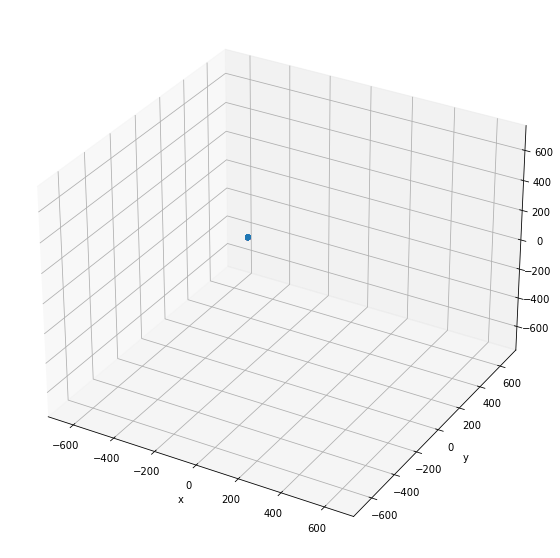

In [46]:
population = 100
dimension = 3
position_min = -700.0
position_max = 700.0
generation = 1000
fitness_criterion = 10e-4
pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

In [ ]:
import numpy as np
velocities = (np.random.random((6, 2))+ 1)
print(velocities)
                                            
import random
random_number = random.uniform(-10, 10)
print(random_number)

new_velocity = [0.0]*3
print(new_velocity)
print(len(new_velocity))


In [ ]:
for i in range(10):
    velocityO = update_velocity([25,35], [-8,9], [21,32], [20,30])
    print(velocityO)  

In [18]:
a = [1,5,6]
b = [1,5,6]
c= [0,0,0]
for i in range(len(c)):
    c[i] = a[i]+b[i]
    
print(c)

 # Initialise new velocity array
# Randomly generate r1, r2 and inertia weight from normal distribution
w_min= 0.5
r1 = random.uniform(0.01,1.0)
print(r1)
r2 = random.uniform(0.01,1.0)
w = random.uniform(w_min,1.0)
c1 = 0.1
c2 = c

a = c1*r1
print(a)



[2, 10, 12]
0.7431901579236367
0.07431901579236368


In [40]:
import time
import random

class droneClient(object):
    """docstring for Drone."""

    def __init__(self, id):
        self.droneID = id
        self.home_position = None
        self.current_velocity = [0,0,0]
        self.current_position = [0,0,0]
        self.fly_new_position = [0,0,0]
        self.personal_best_position = [0,0,0]
        self.current_best = None
        self.personal_best = None
        self.err_best_i=-1          # best error individual
        self.err_i=-1
    
    def PDRONE(self):
        print("curr pos ",self.current_position)
        print("personal b pos ", self.personal_best_position)
        print("current_best fit", self.current_best)
        print("pbest fit", self.personal_best)
        print("curr vel ", self.current_velocity)

    def evaluate(self, fitness_function):
        self.current_best = fitness_function(self.current_position)
        if self.current_best < self.personal_best:
            self.personal_best = self.current_best
            self.personal_best_position = self.current_position

    def swarmUpdatePosVel(self, swarm_best):
        self.velocityUpdate(swarm_best)
        self.positionNewPosition()

    def positionNewPosition(self):
        for i in range(3):
            self.current_position[i] += self.current_velocity[i]
            
    def velocityUpdate(self, swarm_best, w_min=0.5, max=1.0, c=0.1):
        # Initialise new velocity array
        # Randomly generate r1, r2 and inertia weight from normal distribution
        r1 = random.uniform(0.01,1.0)
        r2 = random.uniform(0.01,1.0)
        w = random.uniform(w_min,max)
        c1 = c
        c2 = c
        new_velocity = [0.0]*3
        # Calculate new velocity
        
    
        for i in range(3):
            inn = w*self.current_velocity[i]
            a = c1*r1*(self.personal_best_position[i] - self.current_position[i])
            b = c2*r2*(swarm_best[i] - self.current_position[i])
            new_velocity[i] = inn + a + b
        
        if self.current_position[2] > -45:
            new_velocity[2] = -5.5
            
       
        self.current_velocity = new_velocity

class PSO(object):
    """docstring for PSO."""

    def __init__(self):
        super(PSO, self).__init__()
        self.drone_list = []
        self.gbest_value = None
        self.gbest_position = [0,0,0]
        self.av_bestfit = 0
        self.swarm_best = [None,None,None]
        self.start()
        self.run()
        self.psoUpdate()

    def fitness_function(self, dronePos):
        x1 = dronePos[0]
        x2 = dronePos[1]
        a = [x1,x2]
        b = [25,15]
        dst = distance.euclidean(a, b)
        return dst


    def start(self):
        #self.client.confirmConnection()
        id = "Drone"
        for i in range(10):
            id = "Drone" + str(i+1)
            print(id)
            newDrone = droneClient(id)
            self.drone_list.append(newDrone)

    def run(self):
        print('innit')
        for i in self.drone_list:
            x = random.uniform(-100, 100)
            y = random.uniform(-100, 100)
            i.current_position = [x,y,-50]
            i.personal_best_position = i.current_position  
        
        self.velocity_set()

        for i in self.drone_list:
            i.current_best = self.fitness_function(i.current_position)
            i.personal_best = i.current_best
            i.PDRONE()
            
        self.gbest_value = self.drone_list[0].personal_best
        self.gbest_position = self.drone_list[0].personal_best_position
        
        for i in self.drone_list:
            self.swarmEvaluate(i)
        
        self.avFitnessCalc()
        print(self.gbest_value)
        print(self.gbest_position)
        print(self.av_bestfit)
        print("done innit")
        #innit done

    def velocity_set(self):
        print("innit velocity")
        for i in self.drone_list:
            r1 = random.uniform(-20, 20)
            r2 = random.uniform(-20, 20)
            i.current_velocity = [r1,r2,-2]


    def psoUpdate(self):
        for _ in range(0,400):
            if self.av_bestfit <= 10e-4:
                print("done")
                break
            else:
                for i in self.drone_list:
                    i.swarmUpdatePosVel(self.gbest_position)
                    #cycle through particles in swarm and evaluate fitness
#                     i.evaluate(self.fitness_function)
#                     # determine if the best in swarm
                    
                   
#                 for i in self.drone_list:
#                     self.swarmEvaluate(i)

#                 self.avFitnessCalc()

#                 print(self.gbest_value, 
#                     self.gbest_position, 
#                     self.av_bestfit)
        
    def avFitnessCalc(self):
        av_best = 0
        for i in self.drone_list:
            av_best += i.personal_best
        self.av_bestfit = av_best/len(self.drone_list)

    def swarmEvaluate(self, drone):
        if drone.current_best < self.gbest_value:
            self.gbest_value = drone.personal_best
            self.gbest_position = drone.personal_best_position

if __name__ == '__main__':
    PSO()


Drone1
Drone2
Drone3
Drone4
Drone5
Drone6
Drone7
Drone8
Drone9
Drone10
innit
innit velocity
curr pos  [30.63415229703611, -81.74195124964942, -50]
personal b pos  [30.63415229703611, -81.74195124964942, -50]
current_best fit 96.90587600190065
pbest fit 96.90587600190065
curr vel  [-19.37413820583631, 6.405579131801268, -2]
curr pos  [30.60722981568108, -32.96028425896307, -50]
personal b pos  [30.60722981568108, -32.96028425896307, -50]
current_best fit 48.28695364595289
pbest fit 48.28695364595289
curr vel  [-16.48949464494646, -15.385121001559465, -2]
curr pos  [-48.096965353742924, -58.190581874204184, -50]
personal b pos  [-48.096965353742924, -58.190581874204184, -50]
current_best fit 103.44093782932788
pbest fit 103.44093782932788
curr vel  [-6.762472093836136, -12.573016718502208, -2]
curr pos  [14.203871972841299, -22.56711283501869, -50]
personal b pos  [14.203871972841299, -22.56711283501869, -50]
current_best fit 39.08764954736761
pbest fit 39.08764954736761
curr vel  [9.842

Global Best Position:  [-258.17617624   79.69067539 -478.36899363]
Best Fitness Value:  41.13017758697891
Average Particle Best Fitness Value:  556.6652623199553
Number of Generation:  0
Global Best Position:  [-258.17617624   79.69067539 -478.36899363]
Best Fitness Value:  41.13017758697891
Average Particle Best Fitness Value:  508.0729470546664
Number of Generation:  1
Global Best Position:  [-258.17617624   79.69067539 -478.36899363]
Best Fitness Value:  41.13017758697891
Average Particle Best Fitness Value:  448.0384922086344
Number of Generation:  2
Global Best Position:  [-258.17617624   79.69067539 -478.36899363]
Best Fitness Value:  41.13017758697891
Average Particle Best Fitness Value:  380.2970723994383
Number of Generation:  3
Global Best Position:  [-255.60328679  155.11800477 -457.48390911]
Best Fitness Value:  35.56221424073643
Average Particle Best Fitness Value:  312.67963867513816
Number of Generation:  4
Global Best Position:  [-256.10113659  140.52294297 -461.5251379

Global Best Position:  [-249.98721354  120.00571275 -473.72781058]
Best Fitness Value:  0.014004611447148412
Average Particle Best Fitness Value:  0.7186735752936972
Number of Generation:  46
Global Best Position:  [-249.97485338  120.01152388 -473.64175318]
Best Fitness Value:  0.0276613880693653
Average Particle Best Fitness Value:  0.652145343788456
Number of Generation:  47
Global Best Position:  [-249.9929202   119.97954015 -473.70845021]
Best Fitness Value:  0.021650154372861944
Average Particle Best Fitness Value:  0.5953460639219543
Number of Generation:  48
Global Best Position:  [-250.00411531  119.98463103 -473.71012476]
Best Fitness Value:  0.01591040432623649
Average Particle Best Fitness Value:  0.5344706061146639
Number of Generation:  49
Global Best Position:  [-250.00837175  120.01324038 -473.76876937]
Best Fitness Value:  0.01566505594518814
Average Particle Best Fitness Value:  0.4702608093265369
Number of Generation:  50
Global Best Position:  [-250.00195047  119.99

Global Best Position:  [-250.00000289  119.99999384 -473.77182277]
Best Fitness Value:  6.801167334268335e-06
Average Particle Best Fitness Value:  0.0020519339756032307
Number of Generation:  90
Global Best Position:  [-250.00000496  119.99999835 -473.77183625]
Best Fitness Value:  5.227559970384649e-06
Average Particle Best Fitness Value:  0.0017627842765790091
Number of Generation:  91
Global Best Position:  [-250.00000615  120.00000093 -473.77184398]
Best Fitness Value:  6.215054379893977e-06
Average Particle Best Fitness Value:  0.00150706642244975
Number of Generation:  92
Global Best Position:  [-250.00000696  120.00000269 -473.77184926]
Best Fitness Value:  7.4588191556003555e-06
Average Particle Best Fitness Value:  0.0013085358851361978
Number of Generation:  93
Global Best Position:  [-250.00000767  120.00000425 -473.77185392]
Best Fitness Value:  8.76997743616442e-06
Average Particle Best Fitness Value:  0.0011196954455759813
Number of Generation:  94
Global Best Position: 

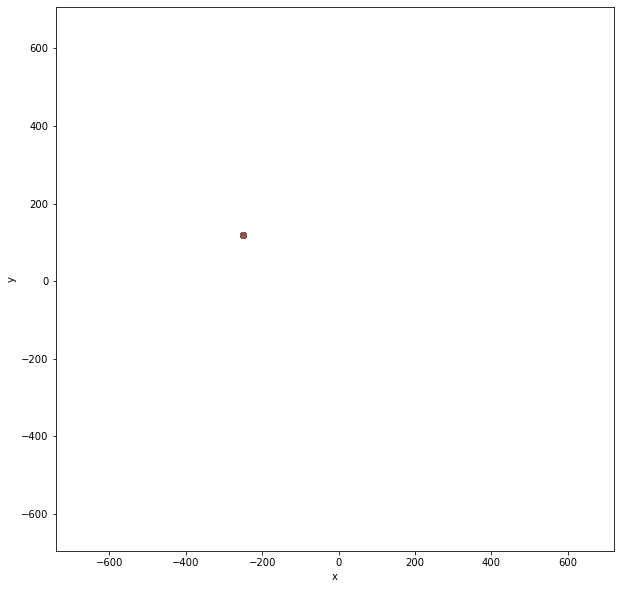

In [27]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    # Initialise new velocity array
    num_particle = len(particle)
    new_velocity = np.array([0.0 for i in range(num_particle)])
    # Randomly generate r1, r2 and inertia weight from normal distribution
    r1 = random.uniform(0,max)
    r2 = random.uniform(0,max)
    w = random.uniform(w_min,max)
    c1 = c
    c2 = c
    # Calculate new velocity
    for i in range(num_particle):
        new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
    return new_velocity

def update_position(particle, velocity):
    # Move particles by adding velocity
    new_particle = particle + velocity
    return new_particle

def fitness_function1(x1,x2):
    a = [x1,x2]
    b = [-250,120]
    dst = distance.euclidean(a, b)
    return dst

def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
    images = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    x = np.linspace(position_min, position_max, 80)
    y = np.linspace(position_min, position_max, 80)
    X, Y = np.meshgrid(x, y)
    # Initialisation
    # Population
    particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
    # Particle's best position
    pbest_position = particles
    # Fitness
    pbest_fitness = [fitness_function2(p[0],p[1]) for p in particles]
    # Index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Global best particle position
    gbest_position = pbest_position[gbest_index]
    # Velocity (starting from 0 speed)
    velocity = [[0.0 for j in range(dimension)] for i in range(population)]  

    # Loop for the number of generation
    for t in range(generation):
        #Stop if the average fitness value reached a predefined success criterion
        if np.average(pbest_fitness) <= fitness_criterion:
            break
        else:
            for n in range(population):
                # Update the velocity of each particle
                velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
                # Move the particles to new position
                particles[n] = update_position(particles[n], velocity[n])
                # Calculate the fitness value
  
                pbest_fitness = [fitness_function1(p[0],p[1]) for p in particles]

                # Find the index of the best particle
                gbest_index = np.argmin(pbest_fitness)
                # Update the position of the best particle
                gbest_position = pbest_position[gbest_index]

                
        #Print the results
        print('Global Best Position: ', gbest_position)
        print('Best Fitness Value: ', min(pbest_fitness))
        print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
        print('Number of Generation: ', t)
        
        image = ax.scatter([
              particles[n][0] for n in range(population)],
             [particles[n][1] for n in range(population)],)
             
        images.append([image])

    
    animated_image = animation.ArtistAnimation(fig, images)
    animated_image.save('./pso_simple.gif', writer='pillow') 
    plt.show()
    
population = 100
dimension = 3
position_min = -700.0
position_max = 700.0
generation = 1000
fitness_criterion = 10e-4
pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

In [23]:
%matplotlib

class PointObj(object):
    def __init__(self, x, y, z):
        self.position = np.array([x, y, z])
 

            

class Drone(object):
    def __init__(self, id, position_min, position_max):
        self.id = id
        self.position = np.array([random.uniform(1000, 1010), random.uniform(1000, 1010), 50 ])
        self.fitness = 0
        self.best_fitness = None
        self.velocity = [0.0,0.0,0.0]
        self.search_position = self.position
        self.found = False
        self.pos_list = []
        self.search_waypoints = []
    
    def local_search(self):
        self.best_position = self.position
    
    def move_to(self, position):
        self.position = np.array(position)
        
    def test_area(self):
        if self.search_position.target_close:
            print(self.search_position.position)
            self.found = True
        
    def fitness_calculation(self, target, radius):
        dist = np.linalg.norm(self.position - target) # Euclidean distance to target
        dist_from_edge = dist - radius # distance from edge of circle
        self.fitness = max(dist_from_edge, 0) # s
        if self.best_fitness != None:
            if self.fitness < self.best_fitness:
                self.best_position = self.position
                self.best_fitness = self.fitness
        else:
            self.best_fitness = self.fitness
        
    def velocity_update(self, drone_list, gbest_position, dist_list, w_min=0.5, max=1.0, c=0.1):
        # Randomly generate r1, r2 and inertia weight from normal distribution
        collision_dist = 15
        r1 = random.uniform(0,max)
        r2 = random.uniform(0,max)
        w = random.uniform(w_min,max)
        c1 = c
        c2 = c
        # Calculate new velocity
#         for i in range(len(self.velocity)):
#             self.velocity[i] = w*self.velocity[i] + c1*r1*(self.best_position[i]-self.position[i]) + c2*r2*(gbest_position[i]-self.position[i])
       
        avoidance_velocity = [0,0,0]
        for drone in drone_list:
            if drone.id != self.id:
                dist = np.linalg.norm(self.position - drone.position)
                if dist < collision_dist:
                    repulsive_force = (self.position - drone.position) / dist**2
                    avoidance_velocity += repulsive_force # add avoidance velocity to total
     
            new_velocity = []   
            for i in range(len(self.velocity)):
                
                new_velocity_i = w * self.velocity[i] + c1 * r1 * (self.best_position[i] - self.position[i]) \
                    + c2 * r2 * (gbest_position[i] - self.position[i]) + avoidance_velocity[i] #+ random.uniform(-0.15, 0.15)
#                 if (self.velocity[i] == 0):
#                     new_velocity_i += random.uniform(-0.1, 0.1)
                #random velocity should be : new_velocity_i += r3 * 0.1 or something. A constant vlue which is controlled by a r3 param
                new_velocity.append(new_velocity_i)
        
            estimate = self.position+new_velocity
            
            if estimate[2] < 50:
                new_velocity[2] += random.uniform(0.5, 1)
                
            if estimate[2] > 60:
                new_velocity[2] -= random.uniform(0.5, 1)
                
#             elif estimate[2] > 100:
#                 new_velocity[2] -= 1
        self.velocity = new_velocity 
        
        #self.direction()
    
    def velocity_update_explore(self, drone_list, unexplored_points, dist_list, position_min, position_max, height_map, w_min=0.5, max=1.0):
        # Randomly generate r1, r2 and inertia weight from normal distribution
        collision_dist = 5
        r1 = random.uniform(0.5,max)
        r2 = random.uniform(0,max)
        w = random.uniform(w_min,max-0.2)
        c1 = 0.8
        c2 = 0.15

        avoidance_velocity = [0,0,0]

        # Calculate the avoidance velocity based on nearby drones
        for drone in drone_list:
            if drone.id != self.id:
                dist = np.linalg.norm(self.position - drone.position)
                if dist < collision_dist:
                    repulsive_force = (self.position - drone.position) / dist**2
                    avoidance_velocity += repulsive_force # add avoidance velocity to total
                    
                    
        exploration_velocity = np.array((self.search_position[:2] - self.position[:2]) / np.linalg.norm(self.search_position[:2] - self.position[:2]))
#         print(attractive_force)
        
        exploration_velocity = np.append(exploration_velocity, 0)

        
        new_velocity = []
        for i in range(len(self.velocity)):
            if i == 2:
                new_velocity_i = w * self.velocity[i] + c1 * r1 * exploration_velocity[i] + c2 * r2 * avoidance_velocity[i]
            else:
                new_velocity_i = w * self.velocity[i] + c1 * r1 * exploration_velocity[i] + c2 * r2 * avoidance_velocity[i] + random.uniform(-5, 5)

            new_velocity.append(new_velocity_i)

        # Check that the new position is within the boundaries of the search area
        estimate = self.position + new_velocity

        for i in range(len(estimate)-1):
            if estimate[i] < position_min[i]:
                new_velocity[i] += random.uniform(0.5, 1)
            elif estimate[i] > position_max[i]:
                new_velocity[i] -= random.uniform(0.5, 1)
                
        try:
            if estimate[2] < height_map[int(estimate[1]), int(estimate[0])] + 50:
                    new_velocity[2] += random.uniform(0.5, 1)
        except:
            new_velocity[2] += random.uniform(0.5, 1)

        new_velocity[2] -= random.uniform(0.1, 0.3)
            
        self.velocity = new_velocity

        
    def position_update(self):
        self.position += self.velocity
        
    def direction(self):
        vx, vy, vz = self.velocity 
        theta_x = np.arctan2(vy, vz)
        theta_y = np.arctan2(vx, vz)
        theta_z = np.arctan2(vx, vy)
        print(self.velocity)
        print(theta_x,theta_y, theta_z)
        fdsfsdfdfs


class PSO(object):
    def __init__(self, population, position_min, position_max, generation, fitness_criterion, target):
        self.population = population
        self.position_min = position_min
        self.position_max = position_max
        self.generation = generation
        self.fitness_criterion = fitness_criterion
        self.target = target
        self.drone_list = []
        self.gbest_fitness = 0
        self.gbest_pos = []
        self.images = []
        self.fig_3d = self.figure_make()
        self.fig = plt.figure(figsize=(10, 10))
        self.ax = self.fig.add_subplot(projection='3d')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.search_radius = 25
#         x = np.linspace(position_min, position_max, 80)
#         y = np.linspace(position_min, position_max, 80)
#         X, Y = np.meshgrid(x, y)
        self.ax.scatter(target[0], target[1], self.heightmap[target[0], target[1]], marker='^', s=15, c="r", label="Fire")
        self.centres = self.get_square_centers(self.position_min, self.position_max, 20)
#         self.fig_3d.scatter(target[0], target[1], target[2], marker='^', s=150, c="r", label="Fire")
#         self.fig_3d.scatter([pp[0] for pp in self.centres],
#                      [pp[1] for pp in self.centres],
#                     [pp[2] for pp in self.centres], marker='^', s=15, c="g")
#         self.fig_3d.legend()
        #self.fig_3d.show()
        
        
        #self.set_best_pos()
        self.drones()
        self.logic_control()#
        
    def figure_make(self):
        import numpy as np
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib import cm
        from PIL import Image
        from scipy.ndimage import gaussian_filter
        %matplotlib

        # Load the heightmap from the PNG file
        img = Image.open('render.png').convert('L')
        heightmap = np.array(img)

        # Smooth the heightmap using a Gaussian filter
        self.heightmap = gaussian_filter(heightmap, sigma=3)
        print(self.heightmap.shape)
        self.position_min = [0,0]
        self.position_max = [self.heightmap.shape[1],self.heightmap.shape[0]]
        # Create a 3D plot
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')

        # Set the x, y, and z limits
        xlen = self.heightmap.shape[1]
        ylen = self.heightmap.shape[0]
        x = np.linspace(0, xlen - 1, xlen)
        y = np.linspace(0, ylen - 1, ylen)
        X, Y = np.meshgrid(x, y)
        Z = self.heightmap #/ 255.0 # normalize the heights to [0,1]

        ax.set_xlim(0, xlen)
        ax.set_ylim(ylen, 0) 
        ax.set_zlim(0, np.max(heightmap))

        # Create a surface plot
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False, zorder=10,alpha=0.4)

        # Add a color bar
        #fig.colorbar(surf, shrink=0.5, aspect=5)

        # Set the scaling of the axes
        ax.set_box_aspect([1., 1, 0.2])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Height')
        
        plt.show()

        return ax
        
    def set_best_pos(self):
        min_index = min(range(len(self.centres)), key=lambda i: self.centres[i].fit_n)
        self.centres[min_index].target_close = True
        print(self.centres[min_index].position)

    def drones(self):
        for i in range(self.population):
            drone = Drone(i, self.position_min, self.position_max)
            self.drone_list.append(drone)   
            
        for i in self.drone_list:
            print(i.position)
            
    def get_distances(self, drone):
        return np.array([other_drones.position - drone.position for other_drones in self.drone_list])
           
        
            
    def get_square_centers(self, min_coord, max_coord, divisions):
#         # Calculate the width and height of each square
#         width = max_val - min_val
       
#         square_width = width // divisions

#         # Calculate the coordinates of the top left corner of the first square
#         x_offset = square_width // 2
#         y_offset = square_width // 2
#         # Create a list to store the square center coordinates
#         square_centers = []
#         best_fit = None
#         # Iterate over each row and column to calculate the center of each square
#         for row in range(divisions):
#             for col in range(divisions):
#                 x = col * square_width + x_offset + min_val
#                 y = row * square_width + y_offset + min_val
#                 z = 50
#                 new_point = [x,y,z]
#                 square_centers.append(new_point)

#         return square_centers
       
        width = max_coord[0] - min_coord[0]
        height = max_coord[1] - min_coord[1]

        rect_width = width // divisions
        rect_height = height // divisions

        # Calculate the coordinates of the top left corner of the first rectangle
        x_offset = rect_width // 2 + min_coord[0]
        y_offset = rect_height // 2 + min_coord[1]

        # Create a list to store the rectangle center coordinates
        rect_centers = []

        # Iterate over each row and column to calculate the center of each rectangle
        for row in range(divisions):
            for col in range(divisions):
                x = row * rect_width + x_offset
                y = col * rect_height + y_offset
                z = self.heightmap[y,x] + 50
                new_point = [float(x),float(y), float(z)]
                rect_centers.append(new_point)
                
        #print(rect_centers)
                
        return rect_centers
    
    def explored_check(self):
        explored_points = set()
        unexplored_points = []
        for drone in self.drone_list:
            for point in self.centres:
                if np.linalg.norm(drone.position[:2] - point[:2]) < 15:
                    explored_points.add(tuple(point))
                    
        for p in self.centres:
            if tuple(p) not in explored_points:
                unexplored_points.append(p)
        self.centres = unexplored_points
        

    def drone_explore_position(self):
        currently_exploring = set()
        minimum_dists = []
        for drone in self.drone_list:
            candidates = []
            for point in self.centres:
                if tuple(point) not in currently_exploring:
                    candidates.append(point)
                    
            if not candidates:
                
                min_dists = np.array([np.linalg.norm(drone.position[:2] - point[:2]) for point in self.centres])
                min_index = np.argmin(min_dists)
                drone.search_position = self.centres[min_index]
            else:
                min_dists = np.array([np.linalg.norm(drone.position[:2] - point[:2]) for point in candidates])
                min_index = np.argmin(min_dists)     
                drone.search_position = candidates[min_index]
                currently_exploring.add(tuple(candidates[min_index]))
            
    def explore(self):
        flag = False
        for t in range(5000):
            if flag:
                print(t)
                break
            self.drone_explore_position()
            for drone in self.drone_list:
                drone.velocity_update_explore(self.drone_list, self.centres, [],
                                              self.position_min, self.position_max, self.heightmap)
                drone.position_update()
                curr_pos = np.array(drone.position)
                drone.pos_list.append(curr_pos)
#                 if distance.euclidean(drone.position[:2], self.target[:2]) < 50:
#                     print(drone.position)
#                     print("fire detected")
#                     flag = True
#                     break
                    
        
            self.explored_check()
            if len(self.centres) == 0:
                print("out of search pos")
                flag = True
                break
                
            print("\r" + str(len(self.centres)), end = " ")
            
        for drone in self.drone_list:
            points = drone.pos_list

            

            x = [p[0] for p in points]
            y = [p[1] for p in points]
            z = [p[2] for p in points]
            self.fig_3d.plot(x, y, z, color='black')

#         self.ax.scatter([pp[0] for pp in self.centres],
#                      [pp[1] for pp in self.centres],
#                     [pp[2] for pp in self.centres], marker='^', s=15, c="g")
        
        self.fig_3d.scatter([drone.position[0] for drone in self.drone_list],
                 [drone.position[1] for drone in self.drone_list],
                [drone.position[2] for drone in self.drone_list])
        
#         self.ax.set_xlabel('X axis ')
#         self.ax.set_ylabel('Y axis ')
#         self.ax.set_zlabel('Z axis ')
#         self.ax.set_box_aspect([1., 1, 0.2])
#         self.ax.set_title('3D PSO exploration using desirable points')
#         self.ax.legend()       
        plt.show()
        
    def scan(self):
        num_drones = len(self.drone_list)
        num_waypoints = len(self.centres)
        
        print(num_waypoints)
        waypoints_per_drone = num_waypoints // num_drones
        print(waypoints_per_drone)


        drone_waypoints = []
        start_idx = 0
        # Assign an equal number of waypoints to each drone
        for i in self.drone_list:
            end_idx = start_idx + waypoints_per_drone

            # For the last drone, assign any remaining waypoints
            if i.id == num_drones-1:
                end_idx = num_waypoints
                i.search_waypoints = self.centres[start_idx:end_idx]
                max_len = len(i.search_waypoints)
            else:
                i.search_waypoints = self.centres[start_idx:end_idx]
                start_idx = end_idx
                
            
            
        flag = False
        for t in range(max_len):
            if flag:
                print(t)
                break
            for drone in self.drone_list:
                if t <= waypoints_per_drone-1:
                    drone.move_to(drone.search_waypoints[t])
                    curr_pos = np.array(drone.position)
                    drone.pos_list.append(curr_pos)
                    if distance.euclidean(drone.position[:2], self.target[:2]) < 50:
                        print(drone.position)
                        print("fire detected")
                        flag = True
                        break
                else:
                    if drone.id == num_drones-1:
                        drone.move_to(drone.search_waypoints[t])
                        
                        curr_pos = np.array(drone.position)
                        drone.pos_list.append(curr_pos)
                        if distance.euclidean(drone.position[:2], self.target[:2]) < 50:
                            print(drone.position)
                            print("fire detected")
                            flag = True
                            break
                    continue

                    
                    
        
            self.explored_check()
            if len(self.centres) == 0:
                print("out of search pos")
                flag = True
                break
            
            
        for drone in self.drone_list:
            points = drone.pos_list

            

            x = [p[0] for p in points]
            y = [p[1] for p in points]
            z = [p[2] for p in points]
            self.fig_3d.plot(x, y, z, color='black')

#         self.ax.scatter([pp[0] for pp in self.centres],
#                      [pp[1] for pp in self.centres],
#                     [pp[2] for pp in self.centres], marker='^', s=15, c="g")
        
        self.fig_3d.scatter([drone.position[0] for drone in self.drone_list],
                 [drone.position[1] for drone in self.drone_list],
                [drone.position[2] for drone in self.drone_list])
        
#         self.ax.set_xlabel('X axis ')
#         self.ax.set_ylabel('Y axis ')
#         self.ax.set_zlabel('Z axis ')
#         self.ax.set_box_aspect([1., 1, 0.2])
#         self.ax.set_title('3D PSO exploration using desirable points')
#         self.ax.legend()       
        plt.show()
        

    
    def logic_control(self):
        print(self.heightmap)
        self.fig_3d.scatter(target[0], target[1], self.heightmap[target[0], target[1]], marker='^', s=150, c="r", label="Fire")
        self.fig_3d.scatter([pp[0] for pp in self.centres],
                     [pp[1] for pp in self.centres],
                    [pp[2] for pp in self.centres], marker='^', s=15, c="g", zorder=0)
        
        print()
        
        
        
        self.explore()
#         self.run()
        #self.scan()
        #self.run()
        
    def run(self):  
        for drone in self.drone_list:
            drone.local_search()

        for drone in self.drone_list:
            drone.fitness_calculation(self.target, self.search_radius)
        
        fitness = [drone.fitness for drone in self.drone_list]
        best_index = np.argmin(fitness)
        self.gbest_fitness = fitness[best_index]
        self.gbest_pos = self.drone_list[best_index].position
        print( self.gbest_fitness, self.gbest_pos)
        
        for t in range(self.generation):
            if np.average([drone.fitness for drone in self.drone_list]) <= self.fitness_criterion:
                print("fit ", t)
                break
            else:
                for drone in self.drone_list:
                    drone.velocity_update(self.drone_list, self.gbest_pos, self.get_distances(drone))
                    drone.position_update()
                    drone.fitness_calculation(self.target, self.search_radius)
                    
                fitness = [drone.fitness for drone in self.drone_list]
                best_index = np.argmin(fitness)
                self.gbest_fitness = fitness[best_index]
                self.gbest_pos = self.drone_list[best_index].position


                image = self.ax.scatter(
                    [drone.position[0] for drone in self.drone_list],
                 [drone.position[1] for drone in self.drone_list],
                [drone.position[2] for drone in self.drone_list])
                
                
                self.images.append([image])
        
        print(self.gbest_fitness, self.gbest_pos , t)
        animated_image = animation.ArtistAnimation(self.fig, self.images)
        animated_image.save('./pso_simple.gif', writer='pillow') 
        plt.show()
        
        self.fig = plt.figure(figsize=(10, 10))
        self.ax = self.fig.add_subplot(projection='3d')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.scatter(target[0], target[1], target[2], marker='^', s=15, c="r")
        

        for drone in self.drone_list:
            print(drone.position)
        
        image =  self.ax.scatter([drone.position[0] for drone in self.drone_list],
                 [drone.position[1] for drone in self.drone_list],
                [drone.position[2] for drone in self.drone_list])
        plt.show()
        
        
generation = 100
population = 18
position_min =  [0, 0]
position_max =  [3500, 1900]
fitness_criterion = 10e-4       
target = [720,620,50]
logic = PSO(population, position_min, position_max, generation, fitness_criterion, target)       


Using matplotlib backend: Qt5Agg
Using matplotlib backend: Qt5Agg
(1874, 3840)
[1000.82116034 1006.29959226   50.        ]
[1009.91086532 1002.91414263   50.        ]
[1002.52540006 1003.07438283   50.        ]
[1003.320191   1003.04564901   50.        ]
[1008.41899499 1008.2938534    50.        ]
[1004.1617833  1004.14445324   50.        ]
[1004.67313658 1003.08463683   50.        ]
[1002.09968452 1004.79334517   50.        ]
[1000.16650747 1005.67690866   50.        ]
[1006.2442382  1008.61007306   50.        ]
[1007.23086222 1006.09125816   50.        ]
[1005.56331148 1002.64507714   50.        ]
[1004.45858804 1009.6908093    50.        ]
[1004.52707394 1004.30745847   50.        ]
[1001.23364813 1007.62248709   50.        ]
[1007.94896991 1001.52240178   50.        ]
[1009.34986685 1006.38291322   50.        ]
[1008.20402346 1009.25586123   50.        ]
[[153 153 154 ...  62  62  62]
 [153 153 154 ...  62  62  62]
 [153 153 154 ...  62  62  62]
 ...
 [168 168 168 ...   0   0   0]


In [68]:
velocity = [-360,-360,-55]

vx, vy, vz = velocity

yaw_rate = math.degrees(math.atan2(vy, vx))

print(yaw_rate)

-135.0


In [45]:
a = np.array( [6.32867547,  1.32489136] )
b= np.array([-360.0, -360.0])

aa = [[12,2,5],[12,252,5],[12,245,5]]
print(np.linalg.norm( b-a))

print(random.sample(aa, 1)[0])

print(distance.euclidean(a, b))


np.argmin(a)
var = [1.56, 2.56356]

for i in var:
    print(i < 200)
    
A1=[576, 467, 153]
B1 = [720,620,50]

distance.euclidean(A1[:2], B1[:2])

514.5409367464559
[12, 252, 5]
514.5409367464559
True
True


233.9957264567026

In [5]:
distance.euclidean([330,325,50], [340,320,50])

11.180339887498949

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from PIL import Image
from scipy.ndimage import gaussian_filter
%matplotlib

# Load the heightmap from the PNG file
img = Image.open('render.png').convert('L')
heightmap = np.array(img)

# Smooth the heightmap using a Gaussian filter
heightmap = gaussian_filter(heightmap, sigma=3)

# Create a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# Set the x, y, and z limits
xlen = heightmap.shape[1]
ylen = heightmap.shape[0]
x = np.linspace(0, xlen - 1, xlen)
y = np.linspace(0, ylen - 1, ylen)
X, Y = np.meshgrid(x, y)
Z = heightmap / 255.0 # normalize the heights to [0,1]

ax.set_xlim(0, xlen)
ax.set_ylim(0, ylen)
ax.set_zlim(0, 1)

# Create a surface plot
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set the scaling of the axes
ax.set_box_aspect([2, 2, 0.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')

plt.show()

Using matplotlib backend: Qt5Agg


In [25]:
%matplotlib

class PointObj(object):
    def __init__(self, x, y, z):
        self.position = np.array([x, y, z])
 

            

class Drone(object):
    def __init__(self, id, position_min, position_max):
        self.id = id
        self.position = np.array([random.uniform(1710, 1750), random.uniform(1000, 1010), 100 ])
        self.fitness = 0
        self.best_fitness = None
        self.velocity = [0.0,0.0,0.0]
        self.search_position = self.position
        self.found = False
        self.pos_list = []
        self.search_waypoints = []
    
    def local_search(self):
        self.best_position = self.position
    
    def move_to(self, position):
        self.position = np.array(position)
        
    def test_area(self):
        if self.search_position.target_close:
            print(self.search_position.position)
            self.found = True
        
    def fitness_calculation(self, target, radius):
        dist = np.linalg.norm(self.position - target) # Euclidean distance to target
        dist_from_edge = dist - radius # distance from edge of circle
        self.fitness = max(dist_from_edge, 0) # s
        if self.best_fitness != None:
            if self.fitness < self.best_fitness:
                self.best_position = self.position
                self.best_fitness = self.fitness
        else:
            self.best_fitness = self.fitness
        
    def velocity_update(self, drone_list, gbest_position, dist_list, heightmap, w_min=0.5, max=1.0, c=0.1):
        # Randomly generate r1, r2 and inertia weight from normal distribution
        collision_dist = 15
        r1 = random.uniform(0,max)
        r2 = random.uniform(0,max)
        w = random.uniform(w_min,max)
        c1 = c
        c2 = c

       
        avoidance_velocity = [0,0,0]
        for drone in drone_list:
            if drone.id != self.id:
                dist = np.linalg.norm(self.position - drone.position)
                if dist < collision_dist:
                    repulsive_force = (self.position - drone.position) / dist**2
                    avoidance_velocity += repulsive_force # add avoidance velocity to total
     
            new_velocity = []   
            for i in range(len(self.velocity)):
                
                new_velocity_i = w * self.velocity[i] + c1 * r1 * (self.best_position[i] - self.position[i]) \
                    + c2 * r2 * (gbest_position[i] - self.position[i]) + avoidance_velocity[i] #+ random.uniform(-0.15, 0.15)
#                 if (self.velocity[i] == 0):
#                     new_velocity_i += random.uniform(-0.1, 0.1)
                #random velocity should be : new_velocity_i += r3 * 0.1 or something. A constant vlue which is controlled by a r3 param
                new_velocity.append(new_velocity_i)
        
            estimate = self.position+new_velocity
            
            if estimate[2] < heightmap[int(estimate[1]), int(estimate[0])]+50:
                new_velocity[2] += random.uniform(0.5, 1)
                
            if estimate[2] > 250:
                new_velocity[2] -= random.uniform(0.5, 1)
                
#             elif estimate[2] > 100:
#                 new_velocity[2] -= 1
        self.velocity = new_velocity 
        
        #self.direction()
    
    def velocity_update_explore(self, drone_list, unexplored_points, dist_list, position_min, position_max, height_map, w_min=0.5, max=1.0):
        # Randomly generate r1, r2 and inertia weight from normal distribution
        collision_dist = 5
        r1 = random.uniform(0.5,max)
        r2 = random.uniform(0,max)
        w = random.uniform(w_min,max-0.2)
        c1 = 0.8
        c2 = 0.15

        avoidance_velocity = [0,0,0]
        exploration_velocity = [0,0,0]

        # Calculate the avoidance velocity based on nearby drones
        for drone in drone_list:
            if drone.id != self.id:
                dist = np.linalg.norm(self.position - drone.position)
                if dist < collision_dist:
                    repulsive_force = (self.position - drone.position) / dist**2
                    avoidance_velocity += repulsive_force # add avoidance velocity to total
        
        exploration_velocity = (self.search_position - self.position) / np.linalg.norm(self.search_position - self.position)
        
        new_velocity = []
        for i in range(len(self.velocity)):
            if i == 2:
                new_velocity_i = w * self.velocity[i] + c1 * r1 * exploration_velocity[i] + c2 * r2 * avoidance_velocity[i]
            else:
                new_velocity_i = w * self.velocity[i] + c1 * r1 * exploration_velocity[i] + c2 * r2 * avoidance_velocity[i] + random.uniform(-5, 5)

            new_velocity.append(new_velocity_i)

        # Check that the new position is within the boundaries of the search area
        estimate = self.position + new_velocity

        for i in range(len(self.position)):
            if estimate[i] < position_min:
                new_velocity[i] += random.uniform(0.5, 1)
            elif estimate[i] > position_max:
                new_velocity[i] -= random.uniform(0.5, 1)
        
        if estimate[2] < height_map[int(estimate[1]), int(estimate[0])]+50:
                new_velocity[2] += random.uniform(0.5, 1)
                
        if estimate[2] > 250:
            new_velocity[2] -= random.uniform(0.5, 1)
            
        self.velocity = new_velocity

        
    def position_update(self):
        self.position += self.velocity
        
    def direction(self):
        vx, vy, vz = self.velocity 
        theta_x = np.arctan2(vy, vz)
        theta_y = np.arctan2(vx, vz)
        theta_z = np.arctan2(vx, vy)
        print(self.velocity)
        print(theta_x,theta_y, theta_z)
        fdsfsdfdfs


class PSO(object):
    def __init__(self, population, position_min, position_max, generation, fitness_criterion, target):
        self.population = population
        self.position_min = position_min
        self.position_max = position_max
        self.generation = generation
        self.fitness_criterion = fitness_criterion
        
        self.drone_list = []
        self.gbest_fitness = 0
        self.gbest_pos = []
        self.images = []
        self.fig_3d = self.figure_make()
        self.target = [target[0], target[1], self.heightmap[target[1], target[0]]+50]
        self.fig = plt.figure(figsize=(10, 10))
        self.ax = self.fig.add_subplot(projection='3d')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.search_radius = 25
        x = np.linspace(position_min, position_max, 80)
        y = np.linspace(position_min, position_max, 80)
        X, Y = np.meshgrid(x, y)
        self.ax.scatter(self.target[0], self.target[1], self.target[2], marker='^', s=15, c="r", label="Fire")
        self.ax.set_box_aspect([1., 1, 0.2])
        self.centres = self.get_square_centers(5)
        
        self.fig_3d.scatter(self.target[0], self.target[1], self.target[2], marker='^', s=25, c="r", label="Fire")
        self.fig_3d.scatter([pp[0] for pp in self.centres],
                     [pp[1] for pp in self.centres],
                    [pp[2] for pp in self.centres], marker='^', s=15, c="g")
        self.fig_3d.legend()
        #self.fig_3d.show()
        
        
        #self.set_best_pos()
        self.drones()
        self.logic_control()#
        
    def figure_make(self):
        import numpy as np
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib import cm
        from PIL import Image
        from scipy.ndimage import gaussian_filter
        %matplotlib

        # Load the heightmap from the PNG file
        img = Image.open('render.png').convert('L')
        heightmap = np.array(img)
        # Smooth the heightmap using a Gaussian filter
        self.heightmap = gaussian_filter(heightmap, sigma=3)

        # Create a 3D plot
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d', alpha = 0.25)

        # Set the x, y, and z limits
        xlen = self.heightmap.shape[1]
        ylen = self.heightmap.shape[0]
        x = np.linspace(0, xlen - 1, xlen)
        y = np.linspace(0, ylen - 1, ylen)
        X, Y = np.meshgrid(x, y)
        Z = self.heightmap #/ 255.0 # normalize the heights to [0,1]

        ax.set_xlim(0, xlen)
        ax.set_ylim(0, ylen)
        ax.set_zlim(0, np.max(heightmap))

        # Create a surface plot
#         surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                                linewidth=0, antialiased=False)

        # Add a color bar
        #fig.colorbar(surf, shrink=0.5, aspect=5)

        # Set the scaling of the axes
        ax.set_box_aspect([1., 1, 0.2])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Height')

        return ax
        
    def set_best_pos(self):
        min_index = min(range(len(self.centres)), key=lambda i: self.centres[i].fit_n)
        self.centres[min_index].target_close = True
        print(self.centres[min_index].position)

    def drones(self):
        for i in range(self.population):
            drone = Drone(i, self.position_min, self.position_max)
            self.drone_list.append(drone)   
            
        for i in self.drone_list:
            print(i.position)
            
    def get_distances(self, drone):
        return np.array([other_drones.position - drone.position for other_drones in self.drone_list])
           
        
    def get_square_centers(self, divisions):
        # Calculate the width and height of each square
         # Calculate the width and height of each rectangle
        min_coord = [0,0]
        max_coord = [3500,1750]
        width = max_coord[0] - min_coord[0]
        height = max_coord[1] - min_coord[1]

        rect_width = width // divisions
        rect_height = height // divisions

        # Calculate the coordinates of the top left corner of the first rectangle
        x_offset = rect_width // 2 + min_coord[0]
        y_offset = rect_height // 2 + min_coord[1]

        # Create a list to store the rectangle center coordinates
        rect_centers = []

        # Iterate over each row and column to calculate the center of each rectangle
        for row in range(divisions):
            for col in range(divisions):
                x = row * rect_width + x_offset
                y = col * rect_height + y_offset
                z = self.heightmap[y,x] + 50
                new_point = [float(x),float(y), float(z)]
                rect_centers.append(new_point)
                
        print(rect_centers)
                
        return rect_centers
    
    def explored_check(self):
        explored_points = set()
        unexplored_points = []
        for drone in self.drone_list:
            for point in self.centres:
                if np.linalg.norm(drone.position - point) < 15:
                    explored_points.add(tuple(point))
                    
        for p in self.centres:
            if tuple(p) not in explored_points:
                unexplored_points.append(p)
        self.centres = unexplored_points
        

    def drone_explore_position(self):
        currently_exploring = set()
        minimum_dists = []
        for drone in self.drone_list:
            candidates = []
            for point in self.centres:
                if tuple(point) not in currently_exploring:
                    candidates.append(point)
                    
            if not candidates:
                
                min_dists = np.array([np.linalg.norm(drone.position - point) for point in self.centres])
                min_index = np.argmin(min_dists)
                drone.search_position = self.centres[min_index]
            else:
                min_dists = np.array([np.linalg.norm(drone.position - point) for point in candidates])
                min_index = np.argmin(min_dists)     
                drone.search_position = candidates[min_index]
                currently_exploring.add(tuple(candidates[min_index]))
            
    def explore(self):
        flag = False
        for t in range(500):
            if flag:
                print(t)
                break
            self.drone_explore_position()
            for drone in self.drone_list:
                drone.velocity_update_explore(self.drone_list, self.centres, [],
                                              self.position_min, self.position_max, self.heightmap)
                drone.position_update()
                curr_pos = np.array(drone.position)
                drone.pos_list.append(curr_pos)

                if distance.euclidean(drone.position, self.target) < 15:
                    print(drone.position)
                    print("fire detected")
                    flag = True
                    break
                    
        
            self.explored_check()
            if len(self.centres) == 0:
                print("out of search pos")
                flag = True
                break
#             print(len(self.centres))
            
        for drone in self.drone_list:
            points = drone.pos_list

            

            x = [p[0] for p in points]
            y = [p[1] for p in points]
            z = [p[2] for p in points]
            self.ax.plot(x, y, z, color='black')

        self.ax.scatter([pp[0] for pp in self.centres],
                     [pp[1] for pp in self.centres],
                    [pp[2] for pp in self.centres], marker='^', s=15, c="g")
        
        self.ax.scatter([drone.position[0] for drone in self.drone_list],
                 [drone.position[1] for drone in self.drone_list],
                [drone.position[2] for drone in self.drone_list])
        
        self.ax.set_xlabel('X axis ')
        self.ax.set_ylabel('Y axis ')
        self.ax.set_zlabel('Z axis ')
        self.ax.set_title('3D PSO exploration using desirable points')
        self.ax.legend()       
        plt.show()
        
    def scan(self):
        num_drones = len(self.drone_list)
        num_waypoints = len(self.centres)
        
        print(num_waypoints)
        waypoints_per_drone = num_waypoints // num_drones
        print(waypoints_per_drone)

        drone_waypoints = []
        start_idx = 0

        # Assign an equal number of waypoints to each drone
        for i in self.drone_list:
            end_idx = start_idx + waypoints_per_drone

            # For the last drone, assign any remaining waypoints
            if i.id == num_drones - 1:
                end_idx = num_waypoints

            i.search_waypoints = self.centres[start_idx:end_idx]
            start_idx = end_idx
            
            
        flag = False
        for t in range(waypoints_per_drone):
            if flag:
                print(t)
                break
            for drone in self.drone_list:
                drone.move_to(drone.search_waypoints[t])
                curr_pos = np.array(drone.position)
                drone.pos_list.append(curr_pos)
                if distance.euclidean(drone.position, self.target) < 50:
                    print(drone.position)
                    print("fire detected")
                    flag = True
                    break
                    
        
            self.explored_check()
            if len(self.centres) == 0:
                print("out of search pos")
                flag = True
                break
            
        for i in self.drone_list:
            points = i.pos_list
            x = [p[0] for p in points]
            y = [p[1] for p in points]
            z = [p[2] for p in points]
            self.ax.plot(x, y, z, color='black')
        plt.show()

        

    
    def logic_control(self):
        self.explore()
#         self.run()
        #self.scan()
        #self.run()
        
    def run(self):  
        for drone in self.drone_list:
            drone.local_search()

        for drone in self.drone_list:
            drone.fitness_calculation(self.target, self.search_radius)
        
        fitness = [drone.fitness for drone in self.drone_list]
        best_index = np.argmin(fitness)
        self.gbest_fitness = fitness[best_index]
        self.gbest_pos = self.drone_list[best_index].position
        print( self.gbest_fitness, self.gbest_pos)
        
        for t in range(self.generation):
            if np.average([drone.fitness for drone in self.drone_list]) <= self.fitness_criterion:
                print("fit ", t)
                break
            else:
                for drone in self.drone_list:
                    drone.velocity_update(self.drone_list, self.gbest_pos, self.get_distances(drone), self.heightmap)
                    drone.position_update()
                    drone.fitness_calculation(self.target, self.search_radius)
                    
                fitness = [drone.fitness for drone in self.drone_list]
                best_index = np.argmin(fitness)
                self.gbest_fitness = fitness[best_index]
                self.gbest_pos = self.drone_list[best_index].position


                image = self.ax.scatter(
                    [drone.position[0] for drone in self.drone_list],
                 [drone.position[1] for drone in self.drone_list],
                [drone.position[2] for drone in self.drone_list])
                
                
                self.images.append([image])
        
        print(self.gbest_fitness, self.gbest_pos , t)
        animated_image = animation.ArtistAnimation(self.fig, self.images)
        animated_image.save('./pso_simple.gif', writer='pillow') 
        plt.show()
        
        self.fig = plt.figure(figsize=(10, 10))
        self.ax = self.fig.add_subplot(projection='3d')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.scatter(target[0], target[1], target[2], marker='^', s=15, c="r")
        

        for drone in self.drone_list:
            print(drone.position)
        
        image =  self.ax.scatter([drone.position[0] for drone in self.drone_list],
                 [drone.position[1] for drone in self.drone_list],
                [drone.position[2] for drone in self.drone_list])
        plt.show()
        
        
generation = 100
population = 20
position_min = -700.0
position_max = 700.0
fitness_criterion = 10e-4       
target = [720,620,50]
logic = PSO(population, position_min, position_max, generation, fitness_criterion, target)       


Using matplotlib backend: Qt5Agg
Using matplotlib backend: Qt5Agg
[[350.0, 175.0, 217.0], [350.0, 525.0, 187.0], [350.0, 875.0, 155.0], [350.0, 1225.0, 181.0], [350.0, 1575.0, 281.0], [1050.0, 175.0, 174.0], [1050.0, 525.0, 159.0], [1050.0, 875.0, 124.0], [1050.0, 1225.0, 125.0], [1050.0, 1575.0, 119.0], [1750.0, 175.0, 209.0], [1750.0, 525.0, 225.0], [1750.0, 875.0, 139.0], [1750.0, 1225.0, 172.0], [1750.0, 1575.0, 118.0], [2450.0, 175.0, 103.0], [2450.0, 525.0, 115.0], [2450.0, 875.0, 88.0], [2450.0, 1225.0, 133.0], [2450.0, 1575.0, 143.0], [3150.0, 175.0, 174.0], [3150.0, 525.0, 98.0], [3150.0, 875.0, 116.0], [3150.0, 1225.0, 100.0], [3150.0, 1575.0, 79.0]]
[1746.02857719 1002.37844643  100.        ]
[1721.92102865 1005.06323495  100.        ]
[1731.07695425 1001.35926558  100.        ]
[1739.78074577 1000.45999393  100.        ]
[1729.50386916 1009.12936629  100.        ]
[1717.50667338 1007.36957653  100.        ]
[1745.74317364 1005.31090933  100.        ]
[1721.13983639 1001.630

NameError: name 'dfsd' is not defined

In [9]:
min_coord = [-500,-500]
max_coord = [500,500]
divisions = 10
# Calculate the width and height of each square
width = max_coord[0] - min_coord[0]
height = max_coord[1] - min_coord[1]

rect_width = width // divisions
rect_height = height // divisions

# Calculate the coordinates of the top left corner of the first rectangle
x_offset = rect_width // 2 + min_coord[0]
y_offset = rect_height // 2 + min_coord[1]

# Create a list to store the rectangle center coordinates
rect_centers = []

# Iterate over each row and column to calculate the center of each rectangle
for row in range(divisions):
    for col in range(divisions):
        x = (row * rect_width + x_offset)
        y = (col * rect_height + y_offset)
        z = -55
        new_point = [float(x),float(y), float(z)]
        rect_centers.append(new_point)

        
print(rect_centers)

[[-450.0, -450.0, -55.0], [-450.0, -350.0, -55.0], [-450.0, -250.0, -55.0], [-450.0, -150.0, -55.0], [-450.0, -50.0, -55.0], [-450.0, 50.0, -55.0], [-450.0, 150.0, -55.0], [-450.0, 250.0, -55.0], [-450.0, 350.0, -55.0], [-450.0, 450.0, -55.0], [-350.0, -450.0, -55.0], [-350.0, -350.0, -55.0], [-350.0, -250.0, -55.0], [-350.0, -150.0, -55.0], [-350.0, -50.0, -55.0], [-350.0, 50.0, -55.0], [-350.0, 150.0, -55.0], [-350.0, 250.0, -55.0], [-350.0, 350.0, -55.0], [-350.0, 450.0, -55.0], [-250.0, -450.0, -55.0], [-250.0, -350.0, -55.0], [-250.0, -250.0, -55.0], [-250.0, -150.0, -55.0], [-250.0, -50.0, -55.0], [-250.0, 50.0, -55.0], [-250.0, 150.0, -55.0], [-250.0, 250.0, -55.0], [-250.0, 350.0, -55.0], [-250.0, 450.0, -55.0], [-150.0, -450.0, -55.0], [-150.0, -350.0, -55.0], [-150.0, -250.0, -55.0], [-150.0, -150.0, -55.0], [-150.0, -50.0, -55.0], [-150.0, 50.0, -55.0], [-150.0, 150.0, -55.0], [-150.0, 250.0, -55.0], [-150.0, 350.0, -55.0], [-150.0, 450.0, -55.0], [-50.0, -450.0, -55.0], [-5